# 출석*Check*봇

### 모듈 import 및 그래프 폰트 설정


In [0]:
import random
# import numpy as np
import matplotlib.pyplot as plt

##랜덤값과 matplotlib을 쓰기위한 선언


## 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

### random 출석부 텍스트파일 생성

In [0]:
def create_sample():
    Checkbot_SampleData = open('checkbot_sample.txt', 'w', encoding='utf-8')
    name_list='''강수빈 이지환 김찬우 서샛별 고강문 고강우 권현준 정교윤 최태헌 
    황재익 조성준 이준기 이수현 이득기 문정식 이민진 김주찬 전은정 김미경 이진희
    김진성 임성학 이상균 장이욱 김도이 김지혜 진기성 소혜령 강경연 윤태연 장동희 
    최준열 김천실 박재형 신용승 박재은 소희철 남상이'''.split()
## 파일 오픈을 위한 챗봇 샘플.txt 파일중 이름을 작성한다 .split()함수는 문자열을 나눌때 쓰는 함수
    date_list=list(range(20190901, 20190931)) #변수 선언(9월달 날짜)
    info = 'name' #변수선언
    for date in date_list: #날짜리스트 20190901~20190931까지 선언돼있는 리스트
        info += ' '+str(date) #이름 옆에 날짜를 넣어준다

    Checkbot_SampleData.write(info+'\n') ##챗봇 샘플데이터에 name+날짜를 넣는다

    for name in name_list:
        s = name
        for _ in range(len(date_list)):
            s+=' '+random.choice(['y', 'n']) #이름옆에 해당 날짜에 해당하는 출석여부를 랜덤으로 주어지게한다
        Checkbot_SampleData.write(s+'\n') #챗봇 샘플데이터에 출석여부를 넣는다

    Checkbot_SampleData.close()

### 텍스트파일 출력

In [0]:
def print_sample():
    with open('checkbot_sample.txt', 'r', encoding='utf-8') as f:
        data = f.read() #파일 내용 전체를 문자열로 돌려준다.
        print(data) #챗봇 샘플 텍스트를 출력한다.
print_sample()

name 20190901 20190902 20190903 20190904 20190905 20190906 20190907 20190908 20190909 20190910 20190911 20190912 20190913 20190914 20190915 20190916 20190917 20190918 20190919 20190920 20190921 20190922 20190923 20190924 20190925 20190926 20190927 20190928 20190929 20190930
강수빈 n n n y y y y n n n n y y n y n y y y y n n n y n n n n n y
이지환 n y y n y n y y n n y n y y y y y n n y n n n y y y n n y y
김찬우 y y n n n y y n n n y y y n n n y y y y y n n y y y y y y y
서샛별 y y y y n y n y n y n y n y y y n n n n y y n y n y n y y y
고강문 y n y n y y n n y n n n n y n n y y n y y y y y y n n n y y
고강우 y n y n n y n n n n n y y n y n n n y y y n y y y y y y n y
권현준 n n y y y y y y n y n n n n y n n n n y y n y y y n n n n n
정교윤 y n y n y n y n n n n n y y n y n y n y y n n n n y n n n n
최태헌 y n y n y n y n y n y n y n y n n n y y y n y y y y n y n y
황재익 y n y n n y y n y y y y y y n y n n y y y n n y y y n n n n
조성준 y n n y n y n y n y n y y n n n n n n n y n y n n n n y n y
이준기 n n y y y n y y y

### 텍스트파일을 읽어서 자료구조에 저장

In [0]:
def file2dict(file):

    firstLine = file.readline() #string 리턴 해준다 #파일의 첫번째 줄을 읽는다.
    students = file.readlines() #원소는 텍스트한줄(string)인 list 를 리턴 해준다 모든줄을 요소로 갖는 리스트로 돌려준다.
    dateList = (firstLine.strip().split(" ")) #strip메소드는 양끝 개행문자/공백문자 제거/날짜를 리스트로 만들어준다.
    

    resultDict = {} #챗봇딕셔너리를 만든다.

    for student in students:
        #여기서 student는 텍스트 한줄(string)
        studentDict = {} #학생 딕셔너리를 만든다.
        studentInfo = student.strip().split() #students에 있는 리스트를 넣어준다.
        studentName = studentInfo[0] #studentInfo라는 리스트에 있는 0번째값 즉 가장 왼쪽에 있는 학생이름을 변수선언해준다.

        for idx in range(1, len(dateList)):#날짜의 수만큼 값을 만들수 있도록 설정
            studentDict[dateList[idx]] = studentInfo[idx]
 # 처음선언한 학생 디셔너리에 students에 있는 1번째부터 날짜의 수만큼의 리스트-즉 날짜의값을
            # 학생 딕셔너리의 datelist에 날짜 정보를 선언해준다.
        resultDict[studentName] = studentDict
#챗봇딕셔너리의 학생key값에 value값으로 학생딕셔너리를 선언한다.
    return resultDict


### 텍스트 파일 열어주는 함수

In [0]:
def file_open(file_path):
    try:
        f = open(file_path, "r", encoding="utf-8") #파일을 열어주는함수
    except:
        print("파일이 없습니다.\n 샘플을 만들어서 파일을 열겠습니다.")
        create_sample()
        f = open("checkbot_sample.txt", "r", encoding='utf-8')
    return f

### 학생 이름과 날짜를 입력받고 반환하는 함수

In [0]:
def input_name_date(resultDict):
    print()
    print(list(resultDict.keys())) #이름 리스트 출력
    name_loop=True

    while name_loop: #와일함수를 사용하여 루프생성 
        name = input("\n[checkbot] 학생의 이름을 입력하세요\n[관리자] => ") #인풋 함수를 사용하여 어떤학생의 출석여부를 확인할건지 입력하도록함.
        if name not in resultDict:
            print("[checkbot] 등록되지 않은 학생입니다. 다시 한번 확인 후에 입력해주세요\n")
        else:
            name_loop=False #이름을 올바르게 입력하면 루프탈출!

    date_loop=True
    while date_loop: #와일함수를 사용하여 루프생성
        date = input("[checkbot] 날짜를 입력하세요[ex)20190901]\n[관리자] => ") #날짜를 입력받는다.
        if date not in resultDict[name]:
            print('[checkbot] 등록되지 않은 날짜입니다. [20190901~20190930]중 하나의 날짜를 8자리형식으로 다시 입력해주세요')
        else:
            date_loop=False #if else함수를 활용해서 날짜를 입력받고 입력받은후에는 루프를 탈출한다.
    return name,date #루프를 통해 입력받은 name과 date 값을 반환한다.

### 출석여부 확인해서 출력해주는 함수


In [0]:
def print_attedance(resultDict, name, date):
    if resultDict[name][date] == 'y':
        print("[checkbot] {}학생은 {}에 출석했습니다".format(name, date))
    else:
        print("[checkbot] 학생은 {}에 출석하지 않았습니다".format(name, date))
#학생의 이름과 날짜를 받은후에 그 value값이 y인지n인지 확인후에 출석여부를 확인하고 물자열을 출력한다.

### 출석률 계산해서 반환해주는 함수

In [0]:
def attendanceRate(resultDict,name):
    attendanceCnt = 0 #임의의 변수선언
    for value in resultDict[name].values():
        if(value == 'y'):
            attendanceCnt += 1#for문을 사용하여 value값이 y일경우에 출석횟수의 값을 증가시킨다.
    attendanceRate = attendanceCnt / len(resultDict[name]) * 100
    print('[checkbot] {}학생의 출석률은 {:.1f}%입니다'.format(name, attendanceRate))
    #해당학생의 출석률을 계산한다 이후 출석률을 소수점한자리까지 출력.
    

### 그래프 출력해주는 함수

In [0]:
def make_graph(resultDict, name): #그래프를 출력하는 함수
    if name not in resultDict:
        print("[checkbot] 등록되지 않은 학생입니다")
        return

    print('[checkbot] 그래프를 출력합니다.')


    x_list = [] #x축 리스트생성
    ynList = [] #y축 리스트생성

    for i, (n, attend_dict) in enumerate(resultDict.items()): #챗봇딕셔너리 n=학생 attend=학생딕셔너리
        total_attend = 0
        for yn in attend_dict.values(): #학생딕셔너리의 values값->출석여부
            if yn == 'y':
                total_attend += 1
#출석을 했을때마다 출석횟수증가
        ## 나머지 회원 이름은 비공개
        if name != n:
            n = 'ㅁㅁㅁ'
        else:
            idx = i

        x_list.append(n) #학생이름을 x리스트에 저장
        ynList.append(total_attend) #총 출석횟수를 yn리스트에 저장

    x = list(range(len(x_list))) 
    fig = plt.figure(figsize=(22, 10)) #그래프크기

    graph = plt.bar(range(len(x_list)), ynList)
    graph[idx].set_color('r')

    plt.title('출석')

    plt.xlabel('이름')
    plt.xticks(x, x_list)
    plt.ylabel('출석횟수')

    plt.show() #그래프출력



### 출석부 출력해주는 함수

In [0]:
def printDict(resultDict):
    print("=" * 100 + "출석부" + "="*100)
    for key, value in resultDict.items():
        print(key, value)
    print("="*203)
    
#학생의 이름과 날짜, 출석여부-출석부를 출력하는 함수

### 출석부 수정해주는 함수

In [0]:
def updateDict(resultDict): #함수선언
    if adminCheck():
        print("[checkbot] 관리자 인증되었습니다.")
        name, date = input_name_date(resultDict)
        beforeUpdate = resultDict[name][date]
        print("\n[checkbot] {}학생의 {}출석기록은 {}입니다.\n".format(name, date, beforeUpdate))


        ynloop = True
        while(ynloop): #루프생성
            yn = input("[checkbot] 수정 하시겠습니까?[y/n]\n[관리자] => ")
            if(yn=='y'): #수정의사여부에 따라 수정을 할경우엔 출석 여부를 바꾼다. 
                if resultDict[name][date]=='y':
                    resultDict[name][date] = 'n'
                else:
                    resultDict[name][date] = 'y'

                print("\n[checkbot] {}학생의 {}출석기록이 {}=>{}로 변경 되었습니다.\n".format(name,date,beforeUpdate,resultDict[name][date]))

                ynloop = False
                return

            elif(yn=='n'): #수정의사가 없을시 루프 탈출
                ynloop = False
                return
            else:
                print("[checkbot] [y/n]입력오류입니다 다시 입력하세요")

    else:
        print("[checkbot] 비밀번호 오류입니다.")
        return

### 가능한 채팅 출력

In [0]:
def print_help():
    print('\n')
    print("="*60)
    print("추가적인 작업을 선택해주세요")
    print("1. 학생의 출석정보 ")
    print("2. 출석부 수정하기")
    print("3. 출석부 출력")
    print("4. 출석률 50% 이하 학생들 확인하기")
    print("5. 출석률 50% 이하 학생 퇴원시키기")
    print("6. 특정 학생 퇴원시키기")
    print("7. checkbot 종료하기")
    print("=" *60)
    print('\n')
    
#간단한 코드정리를 위해 선언

### 관리자 pw 인증 함수

In [0]:
def adminCheck():
    password = input("[checkbot] 관리자 비밀번호를 입력하세요\n[관리자] => ")
    if(password == "admin"):
        return True
    else:
        return False
#수정을 위한 관리자 비밀번호

### 네비게이터 

In [0]:
def navigator(resultDict):
    loop2 = True
    while (loop2):
        print_help()
        try:
            num = int(input("[checkbot] 번호를 입력하세요  \n[관리자] => "))

            if num == 1:
                # name과 date를 물어보고 알려줍니다.
                name, date = input_name_date(resultDict)
                print_attedance(resultDict, name, date)
                attendanceRate(resultDict, name)
                make_graph(resultDict, name)
            elif num == 2:
                updateDict(resultDict)
#파일수정을 하기위한 
            elif num == 3:
                printDict(resultDict)
#출석부출력
            elif num ==4:
                print("[checkbot] 아래의 학생들은 출석률 50% 미만입니다.")
                print(get_under50(resultDict))
            elif num == 5:
                if adminCheck():
                    delete_under50(resultDict)
                else:
                    print("[checkbot] 비밀번호 오류입니다")
            elif num == 6:
                    delete_name = input("[checkbot] 퇴원시킬 학생의 이름을 입력하세요\n[관리자] => ")
                    if(delete_name in resultDict):
                        if adminCheck():
                            del resultDict[delete_name]
                            print("[checkbot] {}학생을 성공적으로 삭제했습니다".format(delete_name))
                        else:
                            print("[checkbot] 비밀번호 오류입니다")
                    else:
                        print("[checkbot] 등록되지 않은 학생입니다")

            elif num == 7:
                print("\n[checkbot] checkbot을 이용해주셔서 감사합니다\n")
                loop2 = False
                return False
            else:
                print("[checkbot] 잘못된 번호를 입력하셨습니다 다시 입력해주세요")
        except:
            print("[checkbot] 잘못된 번호를 입력하셨습니다 다시 입력해주세요")


### 출석률 50% 미만의 학생들 반환

In [0]:
def get_under50(resultDict):
    under50s = []
    for name in list(resultDict.keys()):
        attendanceCnt = 0
        for value in list(resultDict[name].values()):
            if(value == 'y'):
                attendanceCnt += 1
        attendanceRate = attendanceCnt / len(resultDict[name]) * 100
        if attendanceRate < 50:
            under50s.append(name)

    return under50s
#출석률을 계산하여 출석률이 50%미만인 학생들의 이름을 출력한다.

### 출석률 50% 미만의 학생들 출석부에서 삭제

In [0]:
def delete_under50(resultDict):

    under50s = get_under50(resultDict)
    for under50 in under50s:
        del resultDict[under50]
    print("[checkbot] 아래의 학생들이 출석부에서 삭제되었습니다. 출석부를 출력해서 확인할 수도 있습니다.")
    print(under50s)
#출석률이 50%미만인 학생들을 출석부에서 삭제한다.

### 챗봇 시나리오

In [0]:
def scenario(resultDict):
    loop = True

    while (loop):
        # 시작
        print("\n\n[checkbot] 안녕하세요 출석관리봇 checkbot입니다\n")
        loop = navigator(resultDict)
#챗봇 시나리오가 돌아가는 함수 선언

### main함수

In [0]:
def main(): #메인함수선언
    file = file_open("input.txt") #파일 읽어오기
    resultDict = file2dict(file) #텍스트파일을 읽어서 자료구조에 저장
    printDict(resultDict) #출석부출력
    scenario(resultDict)#챗봇시나리오
    file.close()

파일이 없습니다.
 샘플을 만들어서 파일을 열겠습니다.
====================================================================================================출석부====================================================================================================
강수빈 {'20190901': 'n', '20190902': 'n', '20190903': 'n', '20190904': 'y', '20190905': 'y', '20190906': 'y', '20190907': 'y', '20190908': 'n', '20190909': 'y', '20190910': 'y', '20190911': 'y', '20190912': 'y', '20190913': 'y', '20190914': 'y', '20190915': 'n', '20190916': 'n', '20190917': 'n', '20190918': 'y', '20190919': 'y', '20190920': 'n', '20190921': 'n', '20190922': 'n', '20190923': 'y', '20190924': 'y', '20190925': 'y', '20190926': 'y', '20190927': 'y', '20190928': 'n', '20190929': 'y', '20190930': 'y'}
이지환 {'20190901': 'n', '20190902': 'y', '20190903': 'n', '20190904': 'n', '20190905': 'y', '20190906': 'n', '20190907': 'y', '20190908': 'y', '20190909': 'y', '20190910': 'n', '20190911': 'y', '20190912': 'y', '20190913': 'n', '20190914': 'n', '201909

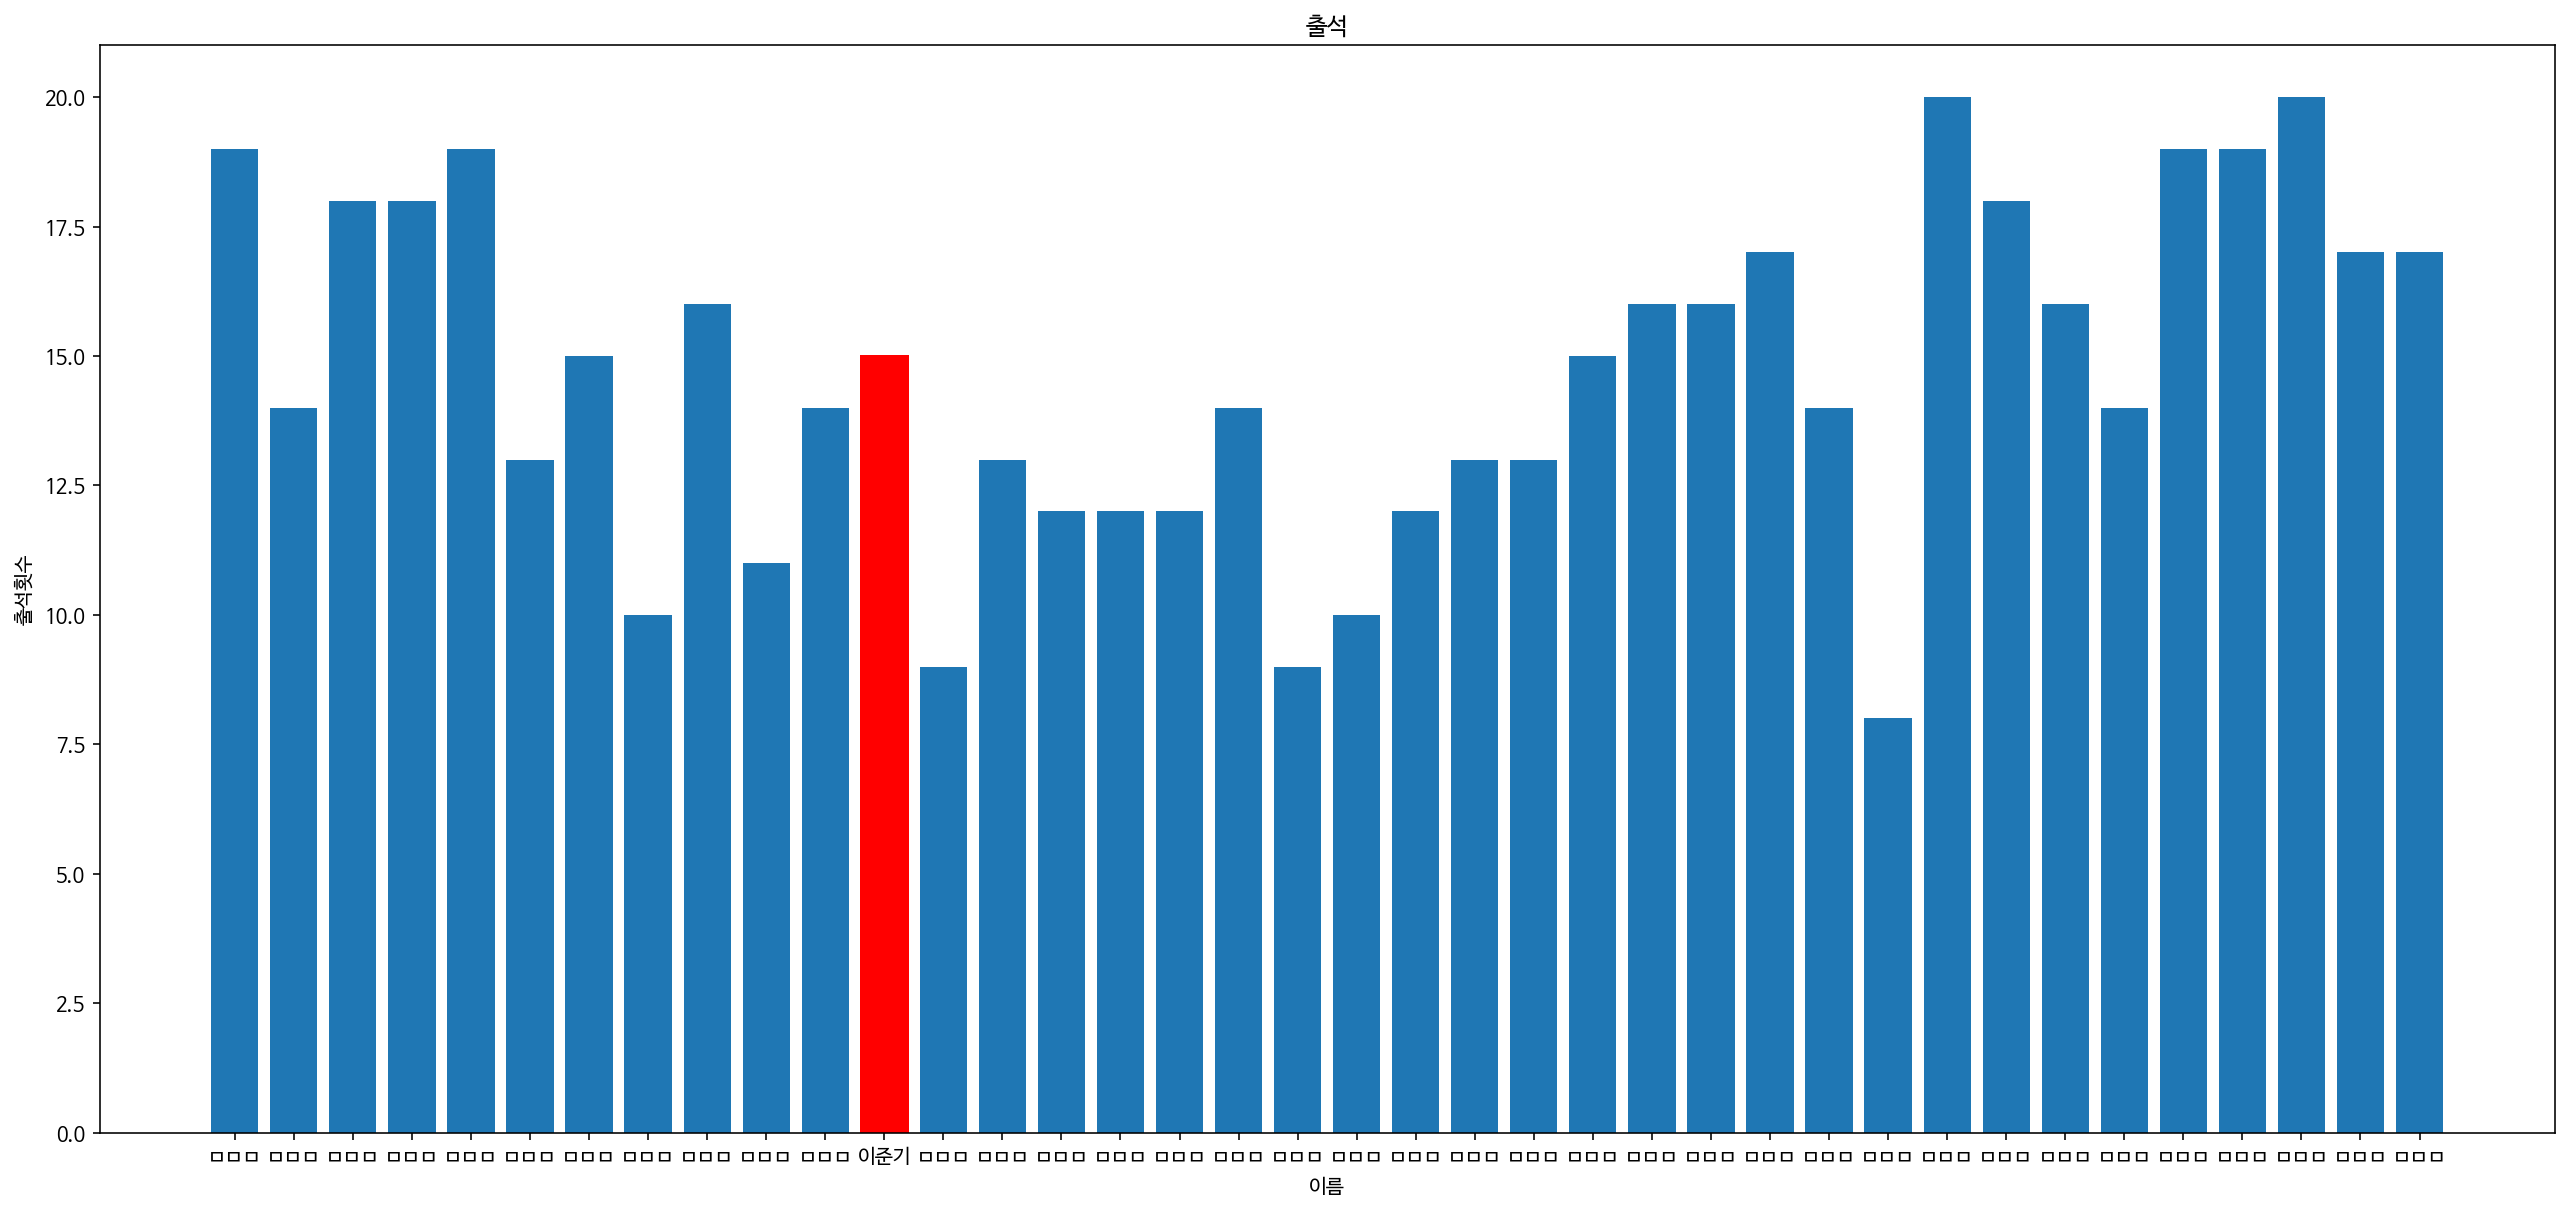



추가적인 작업을 선택해주세요
1. 학생의 출석정보 
2. 출석부 수정하기
3. 출석부 출력
4. 출석률 50% 이하 학생들 확인하기
5. 출석률 50% 이하 학생 퇴원시키기
6. 특정 학생 퇴원시키기
7. checkbot 종료하기


[checkbot] 번호를 입력하세요  
[관리자] => 3
====================================================================================================출석부====================================================================================================
강수빈 {'20190901': 'n', '20190902': 'n', '20190903': 'n', '20190904': 'y', '20190905': 'y', '20190906': 'y', '20190907': 'y', '20190908': 'n', '20190909': 'y', '20190910': 'y', '20190911': 'y', '20190912': 'y', '20190913': 'y', '20190914': 'y', '20190915': 'n', '20190916': 'n', '20190917': 'n', '20190918': 'y', '20190919': 'y', '20190920': 'n', '20190921': 'n', '20190922': 'n', '20190923': 'y', '20190924': 'y', '20190925': 'y', '20190926': 'y', '20190927': 'y', '20190928': 'n', '20190929': 'y', '20190930': 'y'}
이지환 {'20190901': 'n', '20190902': 'y', '20190903': 'n', '20190904': 'n', '20190905': 'y', '20190906': 'n', '201909

In [0]:
if __name__ == '__main__':
    main() #선언한 메인함수를 실행시킨다.